In [40]:
## 1.Read the data
## 2.Drop all unnessasery columns[NA%>50,Unique,Same]
## 3.Train test split
## 4.Fill the issing valuue
## 6.Scale the continous
## 7.Buil the model
## 8.Test

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

In [42]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


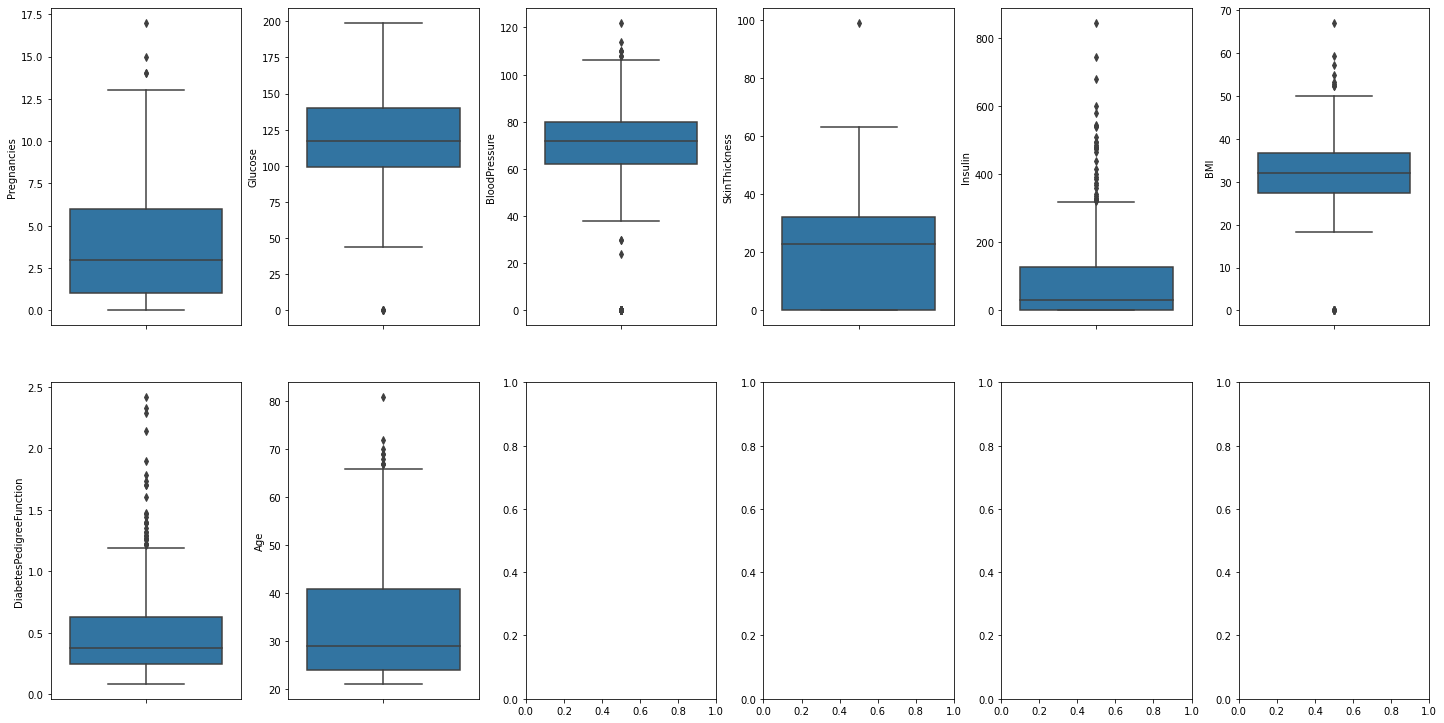

In [75]:
# create boxplot checking for outliers
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)        

In [43]:
y=df['Outcome']
df.drop(['Outcome'],axis=1,inplace=True)

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=43)

# Logistic Regression

In [45]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
pred
print('Train score',logreg.score(X_train,y_train))
print('Test Score',logreg.score(X_test,y_test))


Train score 0.7850162866449512
Test Score 0.7857142857142857


## Checking Efficiency Of Model

In [46]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.21428571428571427
Mean Squared Error 0.21428571428571427
Root Mean Squared Error 0.4629100498862757
R Square Score 0.05888888888888866


# Decision Tree Regressor

In [47]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_train)
print('Train Score',dt.score(X_train,y_train))
print('Test Score',dt.score(X_test,y_test))

Train Score 1.0
Test Score -0.34037037037037066


# Hyperparameter Tunnig DS Tree

In [49]:
ds_tree=DecisionTreeRegressor()

param_dist={"max_depth":[3,None],
            "min_samples_leaf": randint(1,9),
            "criterion":["gini","mse"]
           }
rscv=RandomizedSearchCV(ds_tree,param_distributions=param_dist,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['gini', 'mse'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023DB69798B0>})

In [50]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 8}
DecisionTreeRegressor(max_depth=3, min_samples_leaf=8)
0.1765046611619031


# Random Forest Regerssor

In [51]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print('Train score',rf.score(X_train,y_train))
print('Test Score',rf.score(X_test,y_test))


Train score 0.8994711285046729
Test Score 0.2669058148148147


In [52]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.3105844155844156
Mean Squared Error 0.16692142857142858
Root Mean Squared Error 0.4085601896556107
R Square Score 0.2669058148148147


# Hyperparameter Tunning RF Regressor

In [54]:
rf=RandomForestRegressor(random_state=42)
param_dict={
            'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9,10],
            'max_features':['auto','sqrt','log2']
}
rdsc=RandomizedSearchCV(rf,param_distributions=param_dict,cv=5,verbose=5)
rdsc.fit(X_train,y_train)
pred=rdsc.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70; total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70; total time=   0.2s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70; total time=   0.3s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70; total time=   0.4s
[CV 5/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70; total time=   0.3s
[CV 1/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=   0.4s
[CV 2/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=   0.4s
[CV 3/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=   0.4s
[CV 4/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=   0.4s
[CV 5/5] END max_

In [55]:
print(rdsc.best_params_)
print(rdsc.best_estimator_)
print(rdsc.best_score_)

{'n_estimators': 60, 'min_samples_split': 9, 'max_features': 'log2', 'max_depth': 9}
RandomForestRegressor(max_depth=9, max_features='log2', min_samples_split=9,
                      n_estimators=60, random_state=42)
0.30149068417126534


# 5. Gradiant Boost Regressor

In [56]:
gbc=GradientBoostingRegressor()
gbc.fit(X_train,y_train)
pred=gbc.predict(X_test)
print('Train Score',gbc.score(X_train,y_train))
print('Test Score',gbc.score(X_test,y_test))

Train Score 0.6899302983604945
Test Score 0.21905275173210115


In [57]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.3288204448514588
Mean Squared Error 0.17781730227047787
Root Mean Squared Error 0.421683889033572
R Square Score 0.21905275173210115


# 6. XGBoost Regressor



In [58]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
print('Train Score',xgb.score(X_train,y_train))
print('Test Score',xgb.score(X_test,y_test))

Train Score 0.9995887182793338
Test Score 0.16098106930497424


In [59]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.32021989094153164
Mean Squared Error 0.19103989820176834
Root Mean Squared Error 0.4370811116964085
R Square Score 0.16098106930497424


# 7. Naive Bayes Regressor

In [60]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
print('Train score',gnb.score(X_train,y_train))
print('Test Score',gnb.score(X_test,y_test))

Train score 0.7687296416938111
Test Score 0.7402597402597403


In [61]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.2597402597402597
Mean Squared Error 0.2597402597402597
Root Mean Squared Error 0.5096471914376255
R Square Score -0.14074074074074105


# 8. Support Vector Machine


In [68]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
print('Train score',svr.score(X_train,y_train))
print('Test Score',svr.score(X_test,y_test))


Train score 0.2745819945641841
Test Score 0.30247398904243616


In [69]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.2773582667631507
Mean Squared Error 0.15882275506707894
Root Mean Squared Error 0.3985257269826867
R Square Score 0.30247398904243616


# Hyperparameter Tuning (SVC)


In [70]:
param_dict={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}
rscv=RandomizedSearchCV(svr,param_dict,refit=True,verbose=3)
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=100, gamma=0.01

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [71]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 0.1}
SVR(C=0.1, gamma=0.0001)
0.18529239888685659


# 9. K Nearest Neighbors Regresssor (KNN)


In [72]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('Train Score',knn.score(X_train,y_train))
print('Test Score',knn.score(X_test,y_test))


Train Score 0.38972990654205597
Test Score 0.15699259259259235


In [73]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R Square Score',metrics.r2_score(y_test,pred))

Mean Absolute Error 0.3207792207792208
Mean Squared Error 0.19194805194805195
Root Mean Squared Error 0.43811876466096716
R Square Score 0.15699259259259235


# K-Means Clustering

Text(0.5, 1.0, 'Elbow Curve')

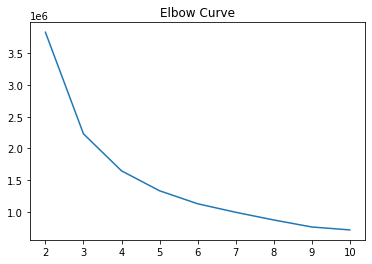

In [74]:
from sklearn.cluster import KMeans
kmns=KMeans()
kmns.fit(X_train)

#finding the optimul number of clusters

num_clusters=range(2,11)

wss=[]                       # Within Sum Of Square(WSS)

for n in num_clusters:
    kmns=KMeans(n_clusters=n)
    kmns.fit(X_train)
    wss.append(kmns.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')
    